<a href="https://colab.research.google.com/github/jen0525/DATAthon/blob/main/JE_albany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

순서가 매우 뒤죽박죽합니다 !!! ㅠㅠ 전처리가 뒤에 가있고 난리가 났다는 점 ㅜㅜㅜ

#**1. 데이터 병합** (날짜 컬럼을 추가-> 하나의 csv로 병합)

In [ ]:
import pandas as pd
import glob
import os
from google.colab import drive

# Google Drive 마운트 (이미 마운트되어 있으면 force_remount=True 생략 가능)
drive.mount('/content/drive', force_remount=True)

# 파일이 들어 있는 폴더 경로 (사용자의 Google Drive 경로에 맞게 수정)
folder_path = "/content/drive/My Drive/C3_dataton"

# 특정 패턴이 포함된 CSV 파일만 필터링 (예: 'lists'가 포함된 파일)
file_list = [file for file in glob.glob(os.path.join(folder_path, "*.csv")) if "listings(d)" in os.path.basename(file)]

# 불러온 파일 리스트 출력
print("불러온 파일 목록:", file_list)

# 데이터 저장 리스트
df_list = []

for file in file_list:
    # CSV 파일 읽기
    try:
        df = pd.read_csv(file)

        # 파일명에서 연-월 정보 추출
        file_name = os.path.basename(file).split(".")[0]  # 확장자 제거
        file_name = file_name.split("-")[0]  # '-' 이후 제거 (250105-listings(d) -> 250105)

        # 앞에서 6자리 (YYMMDD 형식) 중 연도와 월 추출
        year_info = "20" + file_name[:2]  # 앞 2자리 연도 (예: 25 -> 2025)
        month_info = file_name[2:4]  # 3~4번째 자리 월 (예: 01 -> 01)
        date_str = f"{year_info}-{month_info}"  # "2025-01" 형식으로 변환

        # Month 컬럼 추가
        df["Month"] = date_str
        df_list.append(df)
    except Exception as e:
        print(f"❌ 파일 {file_name}을 처리하는 중 오류 발생: {e}")

# 모든 데이터프레임을 하나로 합치기
if df_list:
    final_df = pd.concat(df_list, ignore_index=True)

    # 데이터 확인 (최대 5개 행 미리보기)
    print("✅ 합쳐진 데이터 미리보기:")
    display(final_df)

    # CSV로 저장 (원하는 경우)
    final_df.to_csv("/content/drive/My Drive/airbnb_combined/merged_airbnb_data.csv", index=False)
    print("📂 합쳐진 파일 저장 완료: merged_airbnb_data.csv")
else:
    print("⚠️ 조건에 맞는 파일이 없습니다.")

Mounted at /content/drive
불러온 파일 목록: ['/content/drive/My Drive/C3_dataton/250105_listings(d).csv', '/content/drive/My Drive/C3_dataton/241207_listings(d).csv', '/content/drive/My Drive/C3_dataton/241105_listings(d).csv', '/content/drive/My Drive/C3_dataton/241004_listings(d).csv', '/content/drive/My Drive/C3_dataton/240905_listings(d).csv', '/content/drive/My Drive/C3_dataton/240807_listings(d).csv', '/content/drive/My Drive/C3_dataton/240706_listings(d).csv', '/content/drive/My Drive/C3_dataton/240607_listings(d).csv', '/content/drive/My Drive/C3_dataton/240506_listings(d).csv', '/content/drive/My Drive/C3_dataton/240408_listings(d).csv', '/content/drive/My Drive/C3_dataton/240310_listings(d).csv', '/content/drive/My Drive/C3_dataton/240214_listings(d).csv']
✅ 합쳐진 데이터 미리보기:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Month
0,2992450,https://www.airbnb.com/rooms/2992450,20250105040826,2025-01-05,previous scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,3.22,3.67,NaN,f,1,1,0,0,0.07,2025-01
1,3820211,https://www.airbnb.com/rooms/3820211,20250105040826,2025-01-05,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.82,4.78,NaN,f,4,4,0,0,2.42,2025-01
2,5651579,https://www.airbnb.com/rooms/5651579,20250105040826,2025-01-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.76,4.64,NaN,f,2,1,1,0,3.14,2025-01
3,6623339,https://www.airbnb.com/rooms/6623339,20250105040826,2025-01-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.80,4.72,NaN,f,4,4,0,0,2.82,2025-01
4,9005989,https://www.airbnb.com/rooms/9005989,20250105040826,2025-01-05,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,4.87,4.78,NaN,f,1,1,0,0,5.90,2025-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,1072781767409521866,https://www.airbnb.com/rooms/1072781767409521866,20240214034713,2024-02-14,city scrape,The Bluebird’s Nest,Your family will be close to everything when y...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,426223840,...,3.00,5.00,NaN,t,2,2,0,0,NaN,2024-02
4941,1073179963201889958,https://www.airbnb.com/rooms/1073179963201889958,20240214034713,2024-02-14,city scrape,In the heart of Albany,Enjoy a charming space to work from or come ho...,Located within walking distance of Delaware av...,https://a0.muscache.com/pictures/hosting/Hosti...,31994990,...,NaN,NaN,NaN,f,2,2,0,0,NaN,2024-02
4942,1074653929117126641,https://www.airbnb.com/rooms/1074653929117126641,20240214034713,2024-02-14,city scrape,Room available,You will enjoy easy access to everything from ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,480004905,...,NaN,NaN,NaN,f,2,0,2,0,NaN,2024-02
4943,1075444056381274297,https://www.airbnb.com/rooms/1075444056381274297,20240214034713,2024-02-14,city scrape,The Tangerine Door,"Cozy, private house, living room with 50"" smar...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,542733174,...,5.00,5.00,NaN,f,1,1,0,0,1.00,2024-02


📂 합쳐진 파일 저장 완료: merged_airbnb_data.csv


In [ ]:
import pandas as pd
import glob
import os
from google.colab import drive

# Google Drive 마운트 (이미 마운트되어 있으면 force_remount=True 생략 가능)
drive.mount('/content/drive', force_remount=True)

# 파일이 들어 있는 폴더 경로 (사용자의 Google Drive 경로에 맞게 수정)
folder_path = "/content/drive/My Drive/C3_dataton"

# 특정 패턴이 포함된 CSV 파일만 필터링 (예: 'lists'가 포함된 파일)
file_list = [file for file in glob.glob(os.path.join(folder_path, "*.csv")) if "reviews(d)" in os.path.basename(file)]

# 불러온 파일 리스트 출력
print("불러온 파일 목록:", file_list)

# 데이터 저장 리스트
df_list = []

for file in file_list:
    # CSV 파일 읽기
    try:
        df = pd.read_csv(file)

        # 파일명에서 연-월 정보 추출
        file_name = os.path.basename(file).split(".")[0]  # 확장자 제거
        file_name = file_name.split("-")[0]  # '-' 이후 제거 (250105-listings(d) -> 250105)

        # 앞에서 6자리 (YYMMDD 형식) 중 연도와 월 추출
        year_info = "20" + file_name[:2]  # 앞 2자리 연도 (예: 25 -> 2025)
        month_info = file_name[2:4]  # 3~4번째 자리 월 (예: 01 -> 01)
        date_str = f"{year_info}-{month_info}"  # "2025-01" 형식으로 변환

        # Month 컬럼 추가
        df["Month"] = date_str
        df_list.append(df)
    except Exception as e:
        print(f"❌ 파일 {file_name}을 처리하는 중 오류 발생: {e}")

# 모든 데이터프레임을 하나로 합치기
if df_list:
    final_df = pd.concat(df_list, ignore_index=True)

    # 데이터 확인 (최대 5개 행 미리보기)
    print("✅ 합쳐진 데이터 미리보기:")
    display(final_df)

    # CSV로 저장 (원하는 경우)
    final_df.to_csv("/content/drive/My Drive/airbnb_combined/merged_airbnb_reviews(d)_data.csv", index=False)
    print("📂 합쳐진 파일 저장 완료: merged_airbnb_reviews(d)_data.csv")
else:
    print("⚠️ 조건에 맞는 파일이 없습니다.")

Mounted at /content/drive
불러온 파일 목록: ['/content/drive/My Drive/C3_dataton/250105_reviews(d).csv', '/content/drive/My Drive/C3_dataton/241207_reviews(d).csv', '/content/drive/My Drive/C3_dataton/241105_reviews(d).csv', '/content/drive/My Drive/C3_dataton/241004_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240905_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240807_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240706_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240607_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240506_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240408_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240310_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240214_reviews(d).csv']
✅ 합쳐진 데이터 미리보기:


,listing_id,id,date,reviewer_id,reviewer_name,comments,Month
0,2992450,15066586,2014-07-01,16827297,Kristen,Large apartment; nice kitchen and bathroom. Ke...,2025-01
1,2992450,21810844,2014-10-24,22648856,Christopher,"This may be a little late, but just to say Ken...",2025-01
2,2992450,27434334,2015-03-04,45406,Altay,The apartment was very clean and convenient to...,2025-01
3,2992450,28524578,2015-03-25,5485362,John,Kenneth was ready when I got there and arrange...,2025-01
4,2992450,35913434,2015-06-23,15772025,Jennifer,We were pleased to see how 2nd Street and the ...,2025-01
...,...,...,...,...,...,...,...
284878,1045540313134380198,1089250147436348652,2024-02-11,390075899,Aaron,"Really nice stay, great host and I look forwar...",2024-02
284879,1052381112116173923,1060281966156518424,2024-01-02,184403069,Lawrence,I had a fantastic stay in this beautiful home....,2024-02
284880,1062527013885315764,1082019136908521666,2024-02-01,471611241,예린,"Fantastic accommodation, friendly host, and an...",2024-02
284881,1062527013885315764,1088488460241439684,2024-02-10,553596778,Sariah,Thank you.,2024-02


📂 합쳐진 파일 저장 완료: merged_airbnb_reviews(d)_data.csv


In [ ]:
import pandas as pd
import glob
import os
from google.colab import drive

# Google Drive 마운트 (이미 마운트되어 있으면 force_remount=True 생략 가능)
drive.mount('/content/drive', force_remount=True)

# 파일이 들어 있는 폴더 경로 (사용자의 Google Drive 경로에 맞게 수정)
folder_path = "/content/drive/My Drive/C3_dataton"

# 특정 패턴이 포함된 CSV 파일만 필터링 (예: 'lists'가 포함된 파일)
file_list = [file for file in glob.glob(os.path.join(folder_path, "*.csv")) if "reviews(d)" in os.path.basename(file)]

# 불러온 파일 리스트 출력
print("불러온 파일 목록:", file_list)

# 데이터 저장 리스트
df_list = []

for file in file_list:
    # CSV 파일 읽기
    try:
        df = pd.read_csv(file)

        # 파일명에서 연-월 정보 추출
        file_name = os.path.basename(file).split(".")[0]  # 확장자 제거
        file_name = file_name.split("-")[0]  # '-' 이후 제거 (250105-listings(d) -> 250105)

        # 앞에서 6자리 (YYMMDD 형식) 중 연도와 월 추출
        year_info = "20" + file_name[:2]  # 앞 2자리 연도 (예: 25 -> 2025)
        month_info = file_name[2:4]  # 3~4번째 자리 월 (예: 01 -> 01)
        date_str = f"{year_info}-{month_info}"  # "2025-01" 형식으로 변환

        # Month 컬럼 추가
        df["Month"] = date_str
        df_list.append(df)
    except Exception as e:
        print(f"❌ 파일 {file_name}을 처리하는 중 오류 발생: {e}")

# 모든 데이터프레임을 하나로 합치기
if df_list:
    final_df = pd.concat(df_list, ignore_index=True)

    # 데이터 확인 (최대 5개 행 미리보기)
    print("✅ 합쳐진 데이터 미리보기:")
    display(final_df(5))

    # CSV로 저장 (원하는 경우)
    final_df.to_csv("/content/drive/My Drive/airbnb_combined/merged_airbnb_reviews(d)_data.csv", index=False)
    print("📂 합쳐진 파일 저장 완료: merged_airbnb_reviews(d)_data.csv")
else:
    print("⚠️ 조건에 맞는 파일이 없습니다.")

Mounted at /content/drive
불러온 파일 목록: ['/content/drive/My Drive/C3_dataton/250105_reviews(d).csv', '/content/drive/My Drive/C3_dataton/241207_reviews(d).csv', '/content/drive/My Drive/C3_dataton/241105_reviews(d).csv', '/content/drive/My Drive/C3_dataton/241004_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240905_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240807_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240706_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240607_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240506_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240408_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240310_reviews(d).csv', '/content/drive/My Drive/C3_dataton/240214_reviews(d).csv']
✅ 합쳐진 데이터 미리보기:


TypeError: 'DataFrame' object is not callable

In [ ]:
import pandas as pd
import glob
import os
from google.colab import drive

# Google Drive 마운트 (이미 마운트되어 있으면 force_remount=True 생략 가능)
drive.mount('/content/drive', force_remount=True)

# 파일이 들어 있는 폴더 경로 (사용자의 Google Drive 경로에 맞게 수정)
folder_path = "/content/drive/My Drive/C3_dataton"

# 특정 패턴이 포함된 CSV 파일만 필터링 (예: 'lists'가 포함된 파일)
file_list = [file for file in glob.glob(os.path.join(folder_path, "*.csv")) if "reviews(s)" in os.path.basename(file)]

# 불러온 파일 리스트 출력
print("불러온 파일 목록:", file_list)

# 데이터 저장 리스트
df_list = []

for file in file_list:
    # CSV 파일 읽기
    try:
        df = pd.read_csv(file)

        # 파일명에서 연-월 정보 추출
        file_name = os.path.basename(file).split(".")[0]  # 확장자 제거
        file_name = file_name.split("-")[0]  # '-' 이후 제거 (250105-listings(d) -> 250105)

        # 앞에서 6자리 (YYMMDD 형식) 중 연도와 월 추출
        year_info = "20" + file_name[:2]  # 앞 2자리 연도 (예: 25 -> 2025)
        month_info = file_name[2:4]  # 3~4번째 자리 월 (예: 01 -> 01)
        date_str = f"{year_info}-{month_info}"  # "2025-01" 형식으로 변환

        # Month 컬럼 추가
        df["Month"] = date_str
        df_list.append(df)
    except Exception as e:
        print(f"❌ 파일 {file_name}을 처리하는 중 오류 발생: {e}")

# 모든 데이터프레임을 하나로 합치기
if df_list:
    final_df = pd.concat(df_list, ignore_index=True)

    # 데이터 확인 (최대 5개 행 미리보기)
    print("✅ 합쳐진 데이터 미리보기:")
    display(final_df)

    # CSV로 저장 (원하는 경우)
    final_df.to_csv("/content/drive/My Drive/airbnb_combined/merged_airbnb_reviews(s)_data.csv", index=False)
    print("📂 합쳐진 파일 저장 완료: merged_airbnb_reviews(s)_data.csv")
else:
    print("⚠️ 조건에 맞는 파일이 없습니다.")

Mounted at /content/drive
불러온 파일 목록: ['/content/drive/My Drive/C3_dataton/250105_reviews(s).csv', '/content/drive/My Drive/C3_dataton/241207_reviews(s).csv', '/content/drive/My Drive/C3_dataton/241105_reviews(s).csv', '/content/drive/My Drive/C3_dataton/241004_reviews(s).csv', '/content/drive/My Drive/C3_dataton/240905_reviews(s).csv', '/content/drive/My Drive/C3_dataton/240807_reviews(s).csv', '/content/drive/My Drive/C3_dataton/240706_reviews(s).csv', '/content/drive/My Drive/C3_dataton/240607_reviews(s).csv', '/content/drive/My Drive/C3_dataton/240506_reviews(s).csv', '/content/drive/My Drive/C3_dataton/240408_reviews(s).csv', '/content/drive/My Drive/C3_dataton/240310_reviews(s).csv', '/content/drive/My Drive/C3_dataton/240214_reviews(s).csv']
✅ 합쳐진 데이터 미리보기:


,listing_id,date,Month
0,2992450,2014-07-01,2025-01
1,2992450,2014-10-24,2025-01
2,2992450,2015-03-04,2025-01
3,2992450,2015-03-25,2025-01
4,2992450,2015-06-23,2025-01
...,...,...,...
284878,1045540313134380198,2024-02-11,2024-02
284879,1052381112116173923,2024-01-02,2024-02
284880,1062527013885315764,2024-02-01,2024-02
284881,1062527013885315764,2024-02-10,2024-02


📂 합쳐진 파일 저장 완료: merged_airbnb_reviews(s)_data.csv


In [ ]:
import pandas as pd
import glob
import os
from google.colab import drive

# Google Drive 마운트 (이미 마운트되어 있으면 force_remount=True 생략 가능)
drive.mount('/content/drive', force_remount=True)

# 파일이 들어 있는 폴더 경로 (사용자의 Google Drive 경로에 맞게 수정)
folder_path = "/content/drive/My Drive/C3_dataton"

# 특정 패턴이 포함된 CSV 파일만 필터링 (예: 'lists'가 포함된 파일)
file_list = [file for file in glob.glob(os.path.join(folder_path, "*.csv")) if "listings(s)" in os.path.basename(file)]

# 불러온 파일 리스트 출력
print("불러온 파일 목록:", file_list)

# 데이터 저장 리스트
df_list = []

for file in file_list:
    # CSV 파일 읽기
    try:
        df = pd.read_csv(file)

        # 파일명에서 연-월 정보 추출
        file_name = os.path.basename(file).split(".")[0]  # 확장자 제거
        file_name = file_name.split("-")[0]  # '-' 이후 제거 (250105-listings(d) -> 250105)

        # 앞에서 6자리 (YYMMDD 형식) 중 연도와 월 추출
        year_info = "20" + file_name[:2]  # 앞 2자리 연도 (예: 25 -> 2025)
        month_info = file_name[2:4]  # 3~4번째 자리 월 (예: 01 -> 01)
        date_str = f"{year_info}-{month_info}"  # "2025-01" 형식으로 변환

        # Month 컬럼 추가
        df["Month"] = date_str
        df_list.append(df)
    except Exception as e:
        print(f"❌ 파일 {file_name}을 처리하는 중 오류 발생: {e}")

# 모든 데이터프레임을 하나로 합치기
if df_list:
    final_df = pd.concat(df_list, ignore_index=True)

    # 데이터 확인 (최대 5개 행 미리보기)
    print("✅ 합쳐진 데이터 미리보기:")
    display(final_df)

    # CSV로 저장 (원하는 경우)
    final_df.to_csv("/content/drive/My Drive/airbnb_combined/merged_airbnb_listings(s)_data.csv", index=False)
    print("📂 합쳐진 파일 저장 완료: merged_airbnb_reviews(s)_data.csv")
else:
    print("⚠️ 조건에 맞는 파일이 없습니다.")

Mounted at /content/drive
불러온 파일 목록: ['/content/drive/My Drive/C3_dataton/250105_listings(s).csv', '/content/drive/My Drive/C3_dataton/241207_listings(s).csv', '/content/drive/My Drive/C3_dataton/241105_listings(s).csv', '/content/drive/My Drive/C3_dataton/241004_listings(s).csv', '/content/drive/My Drive/C3_dataton/240905_listings(s).csv', '/content/drive/My Drive/C3_dataton/240807_listings(s).csv', '/content/drive/My Drive/C3_dataton/240706_listings(s).csv', '/content/drive/My Drive/C3_dataton/240607_listings(s).csv', '/content/drive/My Drive/C3_dataton/240506_listings(s).csv', '/content/drive/My Drive/C3_dataton/240408_listings(s).csv', '/content/drive/My Drive/C3_dataton/240214_listings(s).csv', '/content/drive/My Drive/C3_dataton/240310_listings(s).csv']
✅ 합쳐진 데이터 미리보기:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Month
0,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.657890,-73.753700,Entire home/apt,NaN,28,9,2022-08-17,0.07,1,280,0,NaN,2025-01
1,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,NaN,SIXTH WARD,42.652220,-73.767240,Entire home/apt,115.0,2,306,2024-10-14,2.42,4,294,15,NaN,2025-01
2,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,SECOND WARD,42.646150,-73.759660,Entire home/apt,75.0,2,370,2024-10-28,3.14,2,4,38,NaN,2025-01
3,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,NaN,SIXTH WARD,42.652220,-73.767240,Entire home/apt,115.0,2,329,2024-11-30,2.82,4,337,22,NaN,2025-01
4,9005989,"Studio in The heart of Center SQ, in Albany NY",17766924,Sugey,NaN,SIXTH WARD,42.655590,-73.765060,Entire home/apt,85.0,1,605,2024-12-08,5.90,1,355,29,NaN,2025-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,1091422934956081673,2 bed with parking off Madison,232967878,Diana,NaN,TENTH WARD,42.659882,-73.784858,Entire home/apt,105.0,2,0,NaN,NaN,22,87,0,NaN,2024-03
4941,1091500387329731524,Triplex oasis w:parking near MVP,232967878,Diana,NaN,SECOND WARD,42.643241,-73.758052,Entire home/apt,83.0,2,0,NaN,NaN,22,79,0,NaN,2024-03
4942,1097995825442731795,New Center square studio,232967878,Diana,NaN,SIXTH WARD,42.652689,-73.765674,Entire home/apt,93.0,2,0,NaN,NaN,22,75,0,NaN,2024-03
4943,1100876731732967826,"Homey, Quiet 2BR W/ Washer Dryer",152762198,Allen,NaN,FOURTEENTH WARD,42.670080,-73.806911,Entire home/apt,100.0,3,0,NaN,NaN,9,155,0,NaN,2024-03


📂 합쳐진 파일 저장 완료: merged_airbnb_reviews(s)_data.csv


#**2. 분석**

##**2-1. 달별 평균 가격**

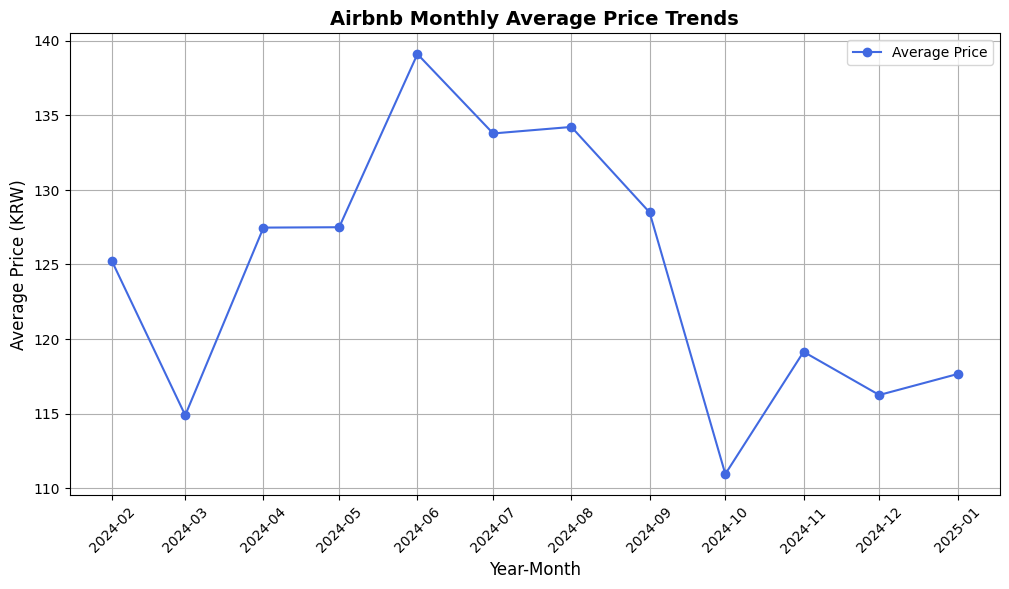

In [ ]:
if "Month" in df.columns and "price" in df.columns:
    # ✅ 가격 컬럼에서 '$' 제거 후 숫자로 변환
    df_thr["price"] = df_thr["price"].astype(str).str.replace("$", "").str.replace(",", "").astype(float)

    # ✅ NaN 및 0 이상 데이터만 유지
    df_thr = df_thr.dropna(subset=["price"])
    df_thr = df_thr[df_thr["price"] > 0]

    # ✅ Month 컬럼을 날짜 형식으로 변환
    df_thr["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")

    # ✅ 월별 평균 가격 계산
    avg_price_per_month = df_thr.groupby("Month")["price"].mean().reset_index()

    # ✅ 모든 월 강제 포함
    full_months = pd.date_range(start="2024-02-01", end="2025-01-01", freq="MS")
    avg_price_per_month = avg_price_per_month.set_index("Month").reindex(full_months).reset_index()
    avg_price_per_month.columns = ["Month", "price"]
    avg_price_per_month["price"] = avg_price_per_month["price"].fillna(0)

    # ✅ 그래프 그리기
    plt.figure(figsize=(12, 6))
    plt.plot(avg_price_per_month["Month"], avg_price_per_month["price"],
             marker="o", linestyle="-", color="royalblue", label="Average Price")

    # ✅ X축 레이블 모든 월 표시 (모든 Month 값 지정)
    plt.xticks(avg_price_per_month["Month"], avg_price_per_month["Month"].dt.strftime("%Y-%m"), rotation=45, fontsize=10)

    plt.xlabel("Year-Month", fontsize=12)
    plt.ylabel("Average Price (KRW)", fontsize=12)
    plt.title("Airbnb Monthly Average Price Trends", fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("⚠️ 'Month' or 'price' column is missing in the dataset.")

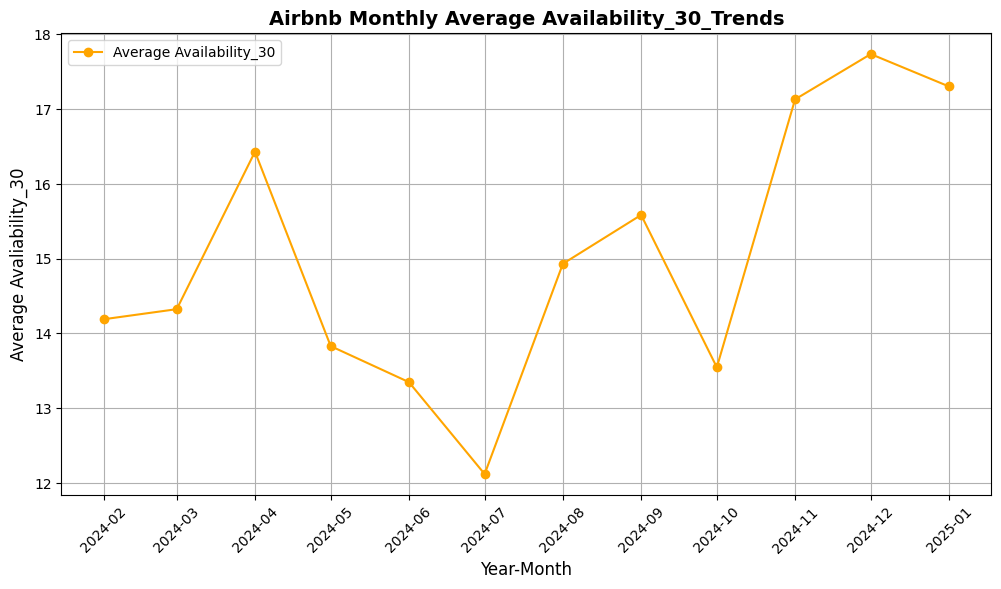

In [ ]:

    # ✅ Month 컬럼을 날짜 형식으로 변환

if "Month" in df.columns and "availability_30" in df_thr.columns:

    df_thr["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")

    # ✅ 월별 평균 가격 계산
    avg_price_per_month = df_thr.groupby("Month")["availability_30"].mean().reset_index()

    # ✅ 모든 월 강제 포함
    full_months = pd.date_range(start="2024-02-01", end="2025-01-01", freq="MS")
    avg_price_per_month = avg_price_per_month.set_index("Month").reindex(full_months).reset_index()
    avg_price_per_month.columns = ["Month", "availability_30"]
    avg_price_per_month["availability_30"] = avg_price_per_month["availability_30"].fillna(0)

    # ✅ 그래프 그리기
    plt.figure(figsize=(12, 6))
    plt.plot(avg_price_per_month["Month"], avg_price_per_month["availability_30"],
             marker="o", linestyle="-", color="orange", label="Average Availability_30")

    # ✅ X축 레이블 모든 월 표시 (모든 Month 값 지정)
    plt.xticks(avg_price_per_month["Month"], avg_price_per_month["Month"].dt.strftime("%Y-%m"), rotation=45, fontsize=10)

    plt.xlabel("Year-Month", fontsize=12)
    plt.ylabel("Average Avaliability_30", fontsize=12)
    plt.title("Airbnb Monthly Average Availability_30_Trends", fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("⚠️ 'Month' or '' column is missing in the dataset.")

In [ ]:
print(df["Month"].value_counts().sort_index())

Month
2024-02-01    364
2024-03-01    350
2024-04-01    378
2024-05-01    344
2024-06-01    381
2024-07-01    384
2024-08-01    384
2024-09-01    400
2024-10-01    347
2024-11-01    384
2024-12-01    391
2025-01-01    395
Name: count, dtype: int64




---


😀😀😀😀이 부분이 방금 돌린 부분입니다 !!






In [ ]:
# 동일한 id와 Month 조합이 몇 번 등장하는지 확인
duplicate_counts = df.duplicated(subset=["id", "Month"]).sum()
print(f"🔍 중복된 데이터 개수: {duplicate_counts}")

🔍 중복된 데이터 개수: 0


In [ ]:
# t 상관 관계 계산 : 리뷰 평점 / 슈퍼호스트 여부
correlation = df[["price", "host_is_superhost"]].corr()
print(correlation)

                      price  host_is_superhost
price              1.000000           0.032235
host_is_superhost  0.032235           1.000000


In [ ]:
# 'host_is_superhost' 컬럼을 숫자로 변환 (True=1, False=0)
df["host_is_superhost"] = df["host_is_superhost"].map({"t": 1, "f": 0})

# 변환 후 상관계수 계산
correlation = df[["review_scores_rating", "host_is_superhost"]].corr()
print(correlation)

                      review_scores_rating  host_is_superhost
review_scores_rating              1.000000           0.376514
host_is_superhost                 0.376514           1.000000


In [ ]:
correlation_matrix = df[["host_is_superhost",
                               "review_scores_cleanliness",
                               "review_scores_checkin",
                               "review_scores_communication",
                               "review_scores_location",
                               "review_scores_value"]].corr()
print(correlation_matrix)

                             host_is_superhost  review_scores_cleanliness  \
host_is_superhost                     1.000000                   0.319660   
review_scores_cleanliness             0.319660                   1.000000   
review_scores_checkin                 0.281519                   0.589653   
review_scores_communication           0.288350                   0.515447   
review_scores_location                0.293792                   0.389162   
review_scores_value                   0.329145                   0.709374   

                             review_scores_checkin  \
host_is_superhost                         0.281519   
review_scores_cleanliness                 0.589653   
review_scores_checkin                     1.000000   
review_scores_communication               0.633453   
review_scores_location                    0.394071   
review_scores_value                       0.701430   

                             review_scores_communication  \
host_is_superhost    

##**2-1. Airbnb의 월별 가격, 가용성, 리뷰 변화**

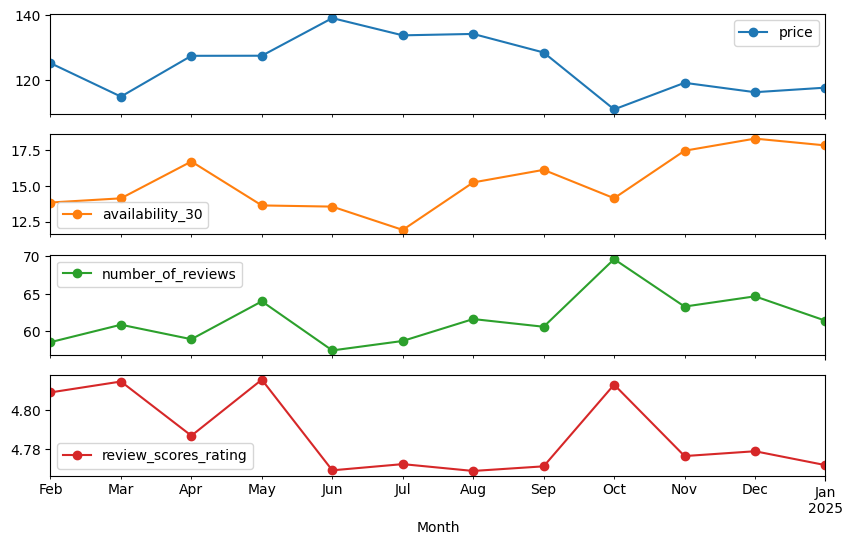

In [ ]:
df_thr.groupby("Month")[["price", "availability_30", "number_of_reviews","review_scores_rating"]].mean().plot(subplots=True, figsize=(10,6), marker="o")
plt.show()

In [ ]:
df_thr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4502 entries, 1 to 4944
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4502 non-null   int64         
 1   listing_url                                   4502 non-null   object        
 2   scrape_id                                     4502 non-null   int64         
 3   last_scraped                                  4502 non-null   object        
 4   source                                        4502 non-null   object        
 5   name                                          4502 non-null   object        
 6   description                                   4385 non-null   object        
 7   picture_url                                   4502 non-null   object        
 8   host_id                                       4502 non-null   int64      

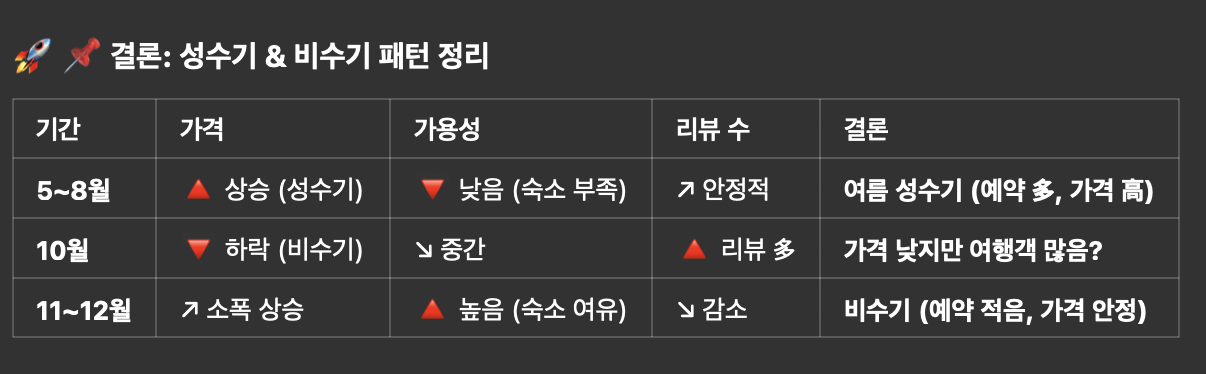

##**2-3.슈퍼호스트는 평점이 높을까?**  cf) 일반호스트

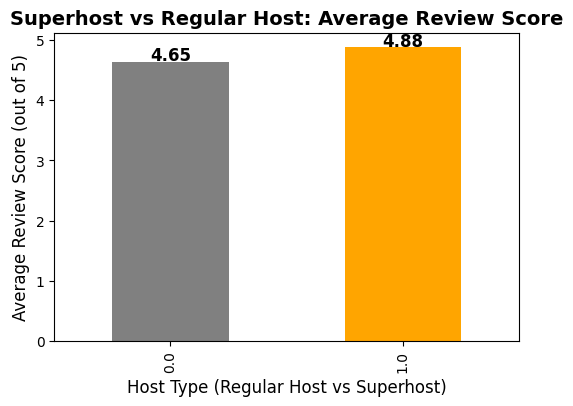

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 데이터 로드 (파일 경로 확인 필요)
file_path = "/content/drive/MyDrive/airbnb_combined/merged_airbnb_listings(d)_data.csv"
df = pd.read_csv(file_path)

# 슈퍼호스트 컬럼을 숫자로 변환 ("t" → 1, "f" → 0)
df["host_is_superhost"] = df["host_is_superhost"].map({"t": 1, "f": 0})

# NaN 값 제거 (혹시라도 리뷰 점수 없는 데이터가 있다면 제거)
df = df.dropna(subset=["review_scores_rating", "host_is_superhost"])

# 슈퍼호스트 여부에 따른 평균 리뷰 점수 계산
avg_rating = df.groupby("host_is_superhost")["review_scores_rating"].mean()

# 막대 그래프 시각화
ax = avg_rating.plot(kind="bar", color=["gray", "orange"], figsize=(6, 4))

# x축과 y축 라벨, 그리고 제목 추가
plt.xlabel("Host Type (Regular Host vs Superhost)", fontsize=12)
plt.ylabel("Average Review Score", fontsize=12)
plt.title("Superhost vs Regular Host: Average Review Score", fontsize=14, fontweight='bold')

# 각 막대 위에 평균 수치 표시
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
            f"{bar.get_height():.2f}", ha='center', fontsize=12, fontweight='bold')

plt.show()

In [ ]:
df[df["host_is_superhost"] == True]["review_scores_rating"].describe()

,review_scores_rating
count,2410.000000
mean,4.880614
std,0.175641
min,3.000000
25%,4.830000
50%,4.920000
75%,4.990000
max,5.000000


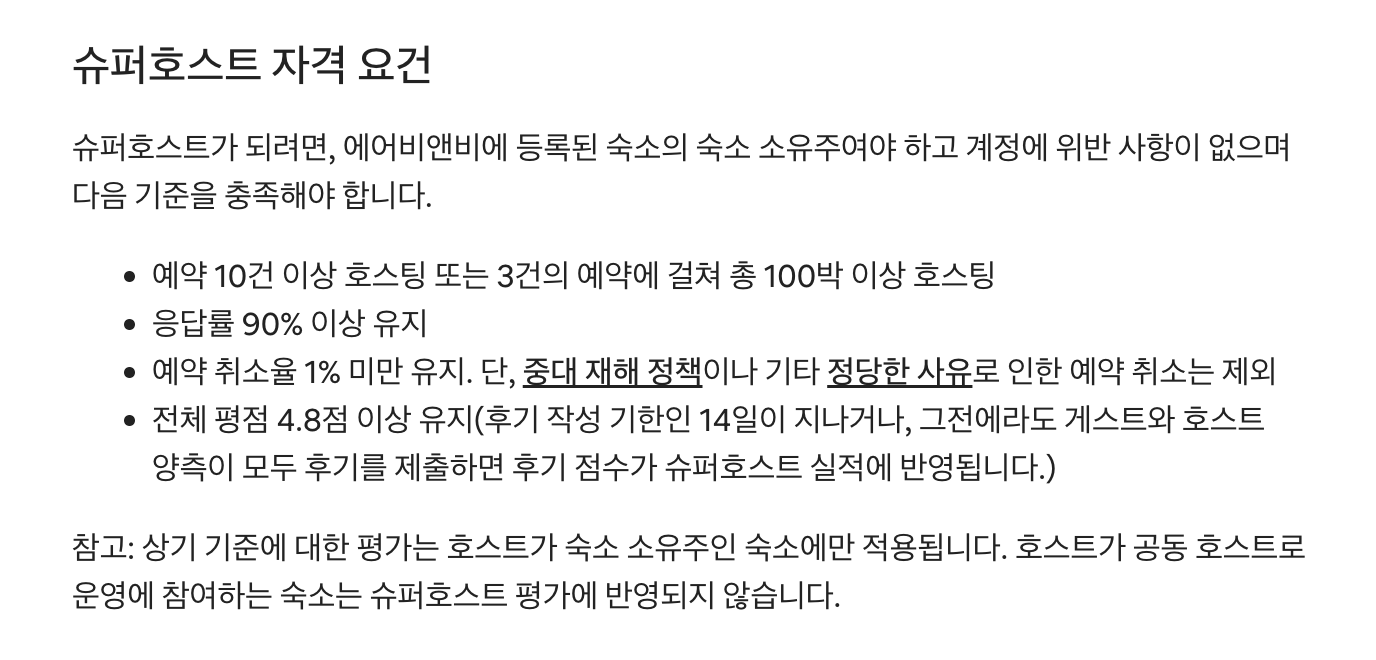

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4260 entries, 0 to 4943
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4260 non-null   int64  
 1   listing_url                                   4260 non-null   object 
 2   scrape_id                                     4260 non-null   int64  
 3   last_scraped                                  4260 non-null   object 
 4   source                                        4260 non-null   object 
 5   name                                          4260 non-null   object 
 6   description                                   4171 non-null   object 
 7   neighborhood_overview                         2509 non-null   object 
 8   picture_url                                   4260 non-null   object 
 9   host_id                                       4260 non-null   int64 

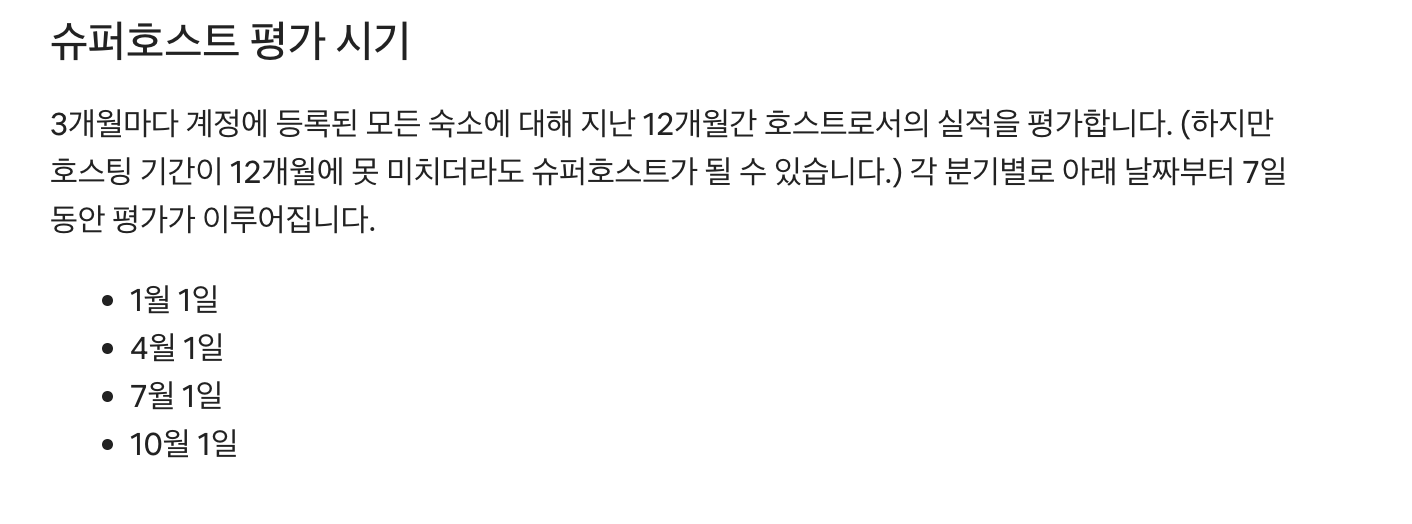

In [ ]:
print(df["price"].isnull().sum())
print(df.info())

443
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4945 non-null   int64  
 1   listing_url                                   4945 non-null   object 
 2   scrape_id                                     4945 non-null   int64  
 3   last_scraped                                  4945 non-null   object 
 4   source                                        4945 non-null   object 
 5   name                                          4945 non-null   object 
 6   description                                   4821 non-null   object 
 7   neighborhood_overview                         2714 non-null   object 
 8   picture_url                                   4945 non-null   object 
 9   host_id                                       4945 non-null

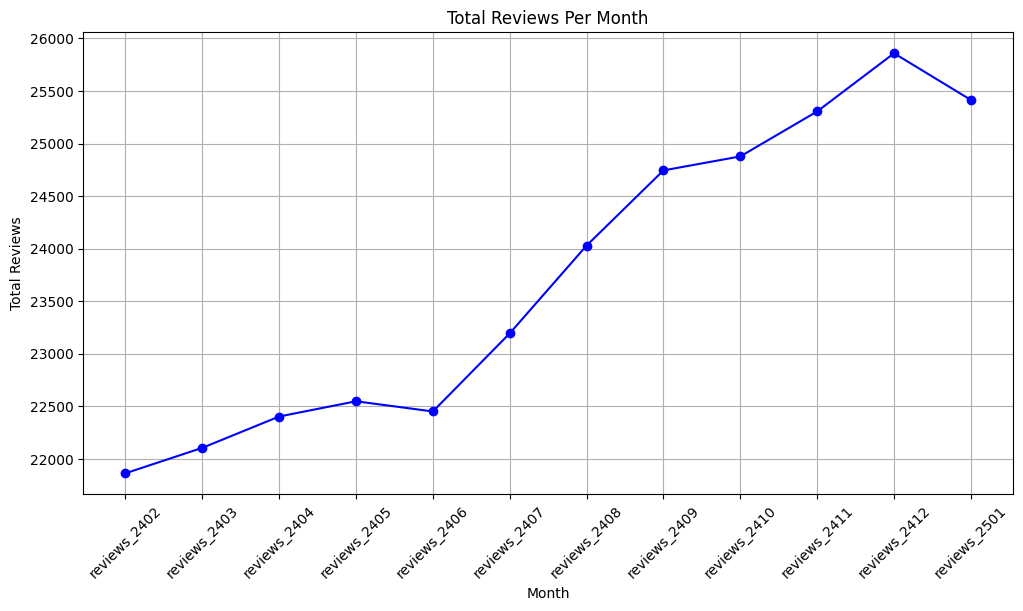

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file_path = "/content/drive/MyDrive/C3_dataton/merged_reviews_data.csv"
df = pd.read_csv(file_path)

# listing_id 컬럼 제거 (필요 없는 경우)
df = df.iloc[:, 1:]

# 각 열(월별) 총 리뷰 수 계산
monthly_review_sums = df.sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(monthly_review_sums.index, monthly_review_sums.values, marker='o', linestyle='-', color='b')

# 그래프 레이블 설정
plt.xlabel("Month")
plt.ylabel("Total Reviews")
plt.title("Total Reviews Per Month")
plt.xticks(rotation=45)  # X축 레이블 기울이기
plt.grid(True)

# 그래프 출력
plt.show()

In [ ]:
import pandas as pd

# CSV 데이터 로드
file_path = "/content/drive/MyDrive/airbnb_combined/merged_airbnb_listings(d)_data.csv"
df = pd.read_csv(file_path)

# 분석할 데이터 선택
df_superhost_analysis = df[["host_is_superhost", "host_listings_count", "price", "review_scores_rating"]].copy()

# 'host_is_superhost'를 숫자로 변환 (1: 슈퍼호스트, 0: 일반 호스트)
df_superhost_analysis["host_is_superhost"] = df_superhost_analysis["host_is_superhost"].map({"t": 1, "f": 0})

# 'price'를 숫자로 변환 (문자열 형태 '$100' → 숫자 100)
df_superhost_analysis["price"] = df_superhost_analysis["price"].replace("[\$,]", "", regex=True).astype(float)

# 결측치 제거 (NaN 제거)
df_superhost_analysis = df_superhost_analysis.dropna()

# 상관계수 분석
correlation = df_superhost_analysis.corr()
print(correlation)

                      host_is_superhost  host_listings_count     price  \
host_is_superhost              1.000000            -0.117254  0.073251   
host_listings_count           -0.117254             1.000000  0.017788   
price                          0.073251             0.017788  1.000000   
review_scores_rating           0.376514            -0.154299  0.081703   

                      review_scores_rating  
host_is_superhost                 0.376514  
host_listings_count              -0.154299  
price                             0.081703  
review_scores_rating              1.000000  


In [ ]:
# amenities 개수 계산 후 새로운 컬럼 생성
df_thr["amenities_count"] = df_thr["amenities"].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# 변환 결과 확인
df_thr[["amenities", "amenities_count"]].head()

,amenities,amenities_count
1,"[""Refrigerator"", ""Hot water"", ""Essentials"", ""S...",28
2,"[""Refrigerator"", ""Hot water"", ""Essentials"", ""S...",33
3,"[""Refrigerator"", ""Hot water"", ""Essentials"", ""S...",31
4,"[""Shower gel"", ""Refrigerator"", ""Hot water"", ""E...",33
5,"[""Shower gel"", ""Refrigerator"", ""Hot water"", ""E...",28


In [ ]:
# 슈퍼호스트 vs 일반 호스트별 평균 비교
superhost_comparison = df_superhost_analysis.groupby("host_is_superhost")[["host_listings_count", "price", "review_scores_rating"]].mean()
print(superhost_comparison)

                   host_listings_count       price  review_scores_rating
host_is_superhost                                                       
0.0                          36.997015  115.480597              4.655833
1.0                           7.463927  130.999125              4.885042


In [ ]:
import plotly.figure_factory as ff

# 숫자형 컬럼만 선택하여 상관관계 계산
df_thr_corr = df_thr.select_dtypes(include=['number']).corr().round(2)

# `price`와의 상관관계만 추출
df_price_corr = df_thr_corr[["price"]].drop(index="price")  # price vs. 나머지 컬럼

# x, y 축 라벨 설정
x_labels = ["price"]
y_labels = df_price_corr.index.tolist()

# 히트맵 생성 (색상 및 간격 조정)
fig = ff.create_annotated_heatmap(
    x=x_labels,
    y=y_labels,
    z=df_price_corr.values,
    annotation_text=df_price_corr.values,  # 숫자값 표시
    colorscale="RdBu_r",  # 대조적인 색상 (파랑-빨강)
    zmin=-1, zmax=1,  # 상관계수 범위 설정 (-1 ~ 1)
    xgap=3, ygap=3,  # 간격 증가로 가독성 향상
    showscale=True
)

# 그래프 스타일 업데이트
fig.update_layout(
    title="<b>Price</b>",
    title_font=dict(size=20),
    xaxis=dict(
        side="bottom",
        tickangle=-45,  # x축 기울기 조정
        tickfont=dict(size=12)  # 축 글씨 크기 조정
    ),
    yaxis=dict(
        autorange="reversed",
        tickfont=dict(size=12)  # y축 글씨 크기 조정
    ),
    width=500, height=850,  # 그래프 크기 조정 (세로형)
    margin=dict(l=100, r=100, t=100, b=100)  # 여백 조정
)

fig.show()

In [ ]:
import plotly.figure_factory as ff

# 숫자형 컬럼만 선택하여 상관관계 계산
df_thr_corr = df_thr.select_dtypes(include=['number']).corr().round(2)

# `review_scores_rating`과의 상관관계만 추출
df_review_corr = df_thr_corr[["review_scores_rating"]].drop(index="review_scores_rating")  # review_scores_rating vs. 나머지 컬럼

# x, y 축 라벨 설정
x_labels = ["review_scores_rating"]
y_labels = df_review_corr.index.tolist()

# 히트맵 생성 (색상 및 간격 조정)
fig = ff.create_annotated_heatmap(
    x=x_labels,
    y=y_labels,
    z=df_review_corr.values,
    annotation_text=df_review_corr.values,  # 숫자값 표시
    colorscale="RdBu_r",  # 대조적인 색상 (파랑-빨강)
    zmin=-1, zmax=1,  # 상관계수 범위 설정 (-1 ~ 1)
    xgap=3, ygap=3,  # 간격 증가로 가독성 향상
    showscale=True
)

# 그래프 스타일 업데이트
fig.update_layout(
    title="<b>Review Scores Rating </b>",
    title_font=dict(size=20),
    xaxis=dict(
        side="bottom",
        tickangle=-45,  # x축 기울기 조정
        tickfont=dict(size=12)  # 축 글씨 크기 조정
    ),
    yaxis=dict(
        autorange="reversed",
        tickfont=dict(size=12)  # y축 글씨 크기 조정
    ),
    width=500, height=850,  # 그래프 크기 조정 (세로형)
    margin=dict(l=100, r=100, t=100, b=100)  # 여백 조정
)

fig.show()

<ipython-input-45-d710b91677f7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="host_is_superhost", y="host_listings_count", data=df_superhost_analysis, palette=["gray", "orange"])


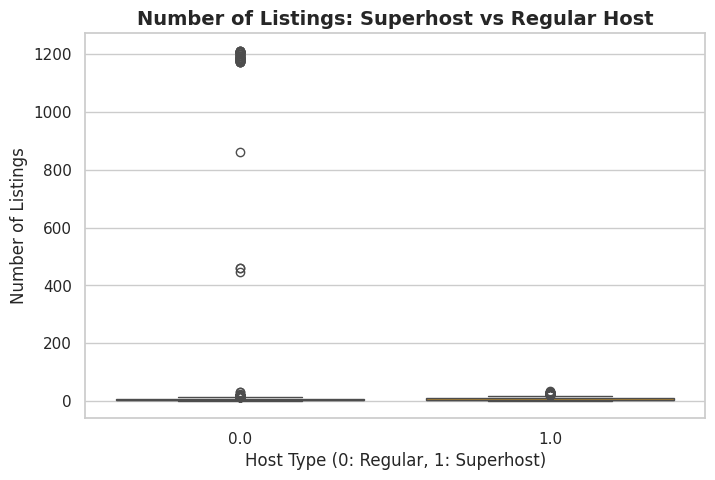

<ipython-input-45-d710b91677f7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="host_is_superhost", y="price", data=df_superhost_analysis, palette=["gray", "orange"])


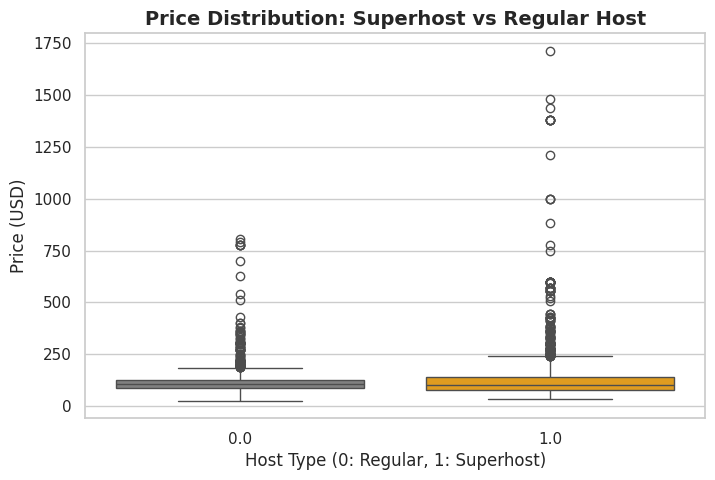

<ipython-input-45-d710b91677f7>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="host_is_superhost", y="review_scores_rating", data=df_superhost_analysis, palette=["gray", "orange"])


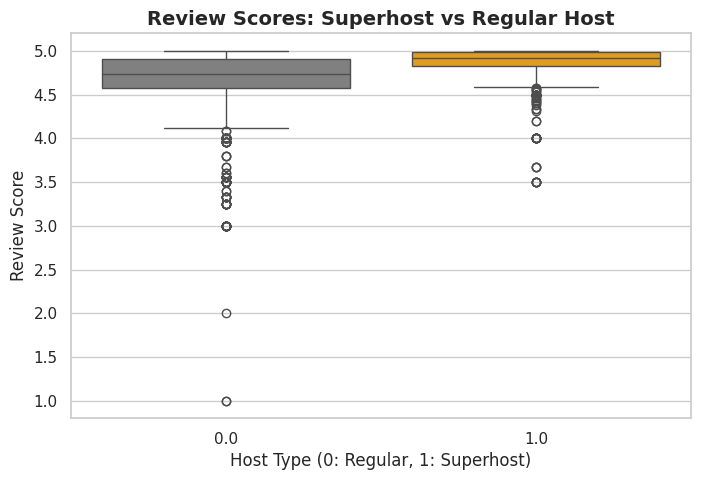

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style="whitegrid")

# 1️⃣ 슈퍼호스트 여부에 따른 숙소 개수 분포
plt.figure(figsize=(8, 5))
sns.boxplot(x="host_is_superhost", y="host_listings_count", data=df_superhost_analysis, palette=["gray", "orange"])
plt.xlabel("Host Type (0: Regular, 1: Superhost)", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.title("Number of Listings: Superhost vs Regular Host", fontsize=14, fontweight='bold')
plt.show()

# 2️⃣ 슈퍼호스트 여부에 따른 가격 분포
plt.figure(figsize=(8, 5))
sns.boxplot(x="host_is_superhost", y="price", data=df_superhost_analysis, palette=["gray", "orange"])
plt.xlabel("Host Type (0: Regular, 1: Superhost)", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.title("Price Distribution: Superhost vs Regular Host", fontsize=14, fontweight='bold')
plt.show()

# 3️⃣ 슈퍼호스트 여부에 따른 리뷰 점수 비교
plt.figure(figsize=(8, 5))
sns.boxplot(x="host_is_superhost", y="review_scores_rating", data=df_superhost_analysis, palette=["gray", "orange"])
plt.xlabel("Host Type (0: Regular, 1: Superhost)", fontsize=12)
plt.ylabel("Review Score", fontsize=12)
plt.title("Review Scores: Superhost vs Regular Host", fontsize=14, fontweight='bold')
plt.show()

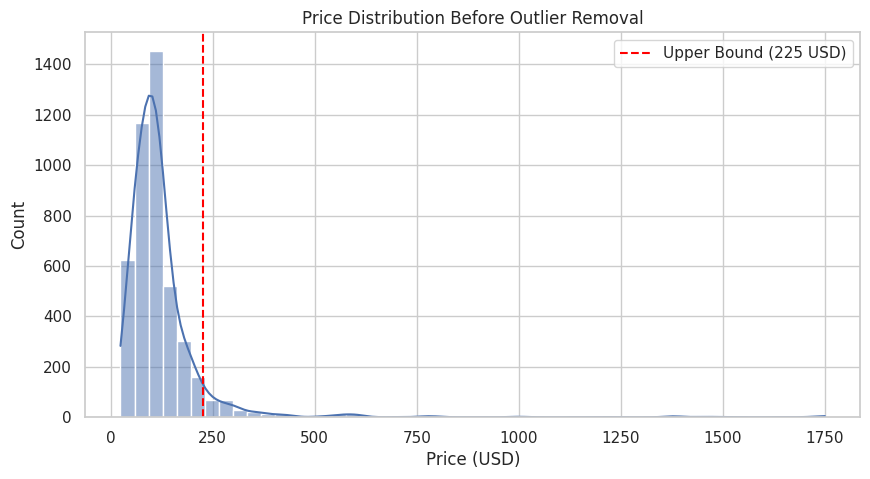

In [ ]:
df_sorted = df.sort_values(by="price", ascending=False)
df_sorted[["name", "price", "neighbourhood", "room_type"]].head(20)

,name,price,neighbourhood,room_type
2872,Charming 1920s house sleeps 6-7,1750.0,Neighborhood highlights,Entire home/apt
4930,Charming 1920s house sleeps 6-7,1750.0,"Albany, New York, United States",Entire home/apt
2029,Charming 1920s house sleeps 6-7,1750.0,Neighborhood highlights,Entire home/apt
4104,Charming 1920s house sleeps 6-7,1750.0,Neighborhood highlights,Entire home/apt
2451,Charming 1920s house sleeps 6-7,1750.0,Neighborhood highlights,Entire home/apt
4520,Charming 1920s house sleeps 6-7,1750.0,"Albany, New York, United States",Entire home/apt
3695,Charming 1920s house sleeps 6-7,1750.0,Neighborhood highlights,Entire home/apt
3104,One-of-a-Kind Luxe Urban Farmhouse w/ Heated Pool,1714.0,Neighborhood highlights,Entire home/apt
150,One-of-a-Kind Luxe Urban Farmhouse w/ Heated Pool,1482.0,Neighborhood highlights,Entire home/apt
3286,Charming 1920s house sleeps 6-7,1464.0,Neighborhood highlights,Entire home/apt


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/airbnb_combined/merged_airbnb_listings(d)_data.csv"
df = pd.read_csv(file_path)
print(type(df))  # DataFrame 타입 확인

# 동일 호스트(host_id)가 운영하는 동일 숙소(id)의 중복 개수 확인
duplicate_counts = df.groupby(["id", "host_id"]).size().reset_index(name="duplicate_count")

# 중복된 데이터만 필터링 (중복 개수가 1보다 큰 경우)
duplicates_only = duplicate_counts[duplicate_counts["duplicate_count"] > 1]

# 중복된 숙소 개수 출력
total_duplicates = duplicates_only["duplicate_count"].sum()
print(f"총 중복된 숙소 개수: {total_duplicates}개")

# 중복된 데이터 확인 (DataFrame 출력)
print(duplicates_only)

<class 'pandas.core.frame.DataFrame'>
총 중복된 숙소 개수: 4912개
                      id    host_id  duplicate_count
0                1489424    5294164                4
1                2992450    4621559               12
2                3820211   19648678               12
3                5651579   29288920               12
4                6623339   19648678               12
..                   ...        ...              ...
569  1296756366433115082  663670719                2
570  1298067362380112500   44434571                2
571  1298625208863760034   47625981                2
572  1300644516303671513  341431807                2
573  1303756679339915039  433096110                2

[547 rows x 3 columns]


In [ ]:
# 모든 열이 동일한 중복 행들을 모두 표시 (첫 번째 행도 포함)
duplicates_all = df[df.duplicated(keep=False)]
print(duplicates_all)

Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_

In [ ]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Month
count,4.502000e+03,4.502000e+03,4.502000e+03,4502.000000,4502.000000,0.0,4502.000000,4502.000000,4502.000000,4502.000000,...,4035.000000,4035.000000,4035.000000,0.0,4502.000000,4502.000000,4502.000000,4502.000000,4034.000000,4502
mean,5.768483e+17,2.024154e+13,2.174186e+08,21.801866,36.982674,NaN,42.657850,-73.776783,3.498667,1.233452,...,4.884290,4.691546,4.750855,NaN,5.611506,4.273434,1.333185,0.004887,2.203991,2024-07-19 15:11:54.882274304
min,1.489424e+06,2.024021e+13,6.576000e+04,1.000000,1.000000,NaN,42.630660,-73.876490,1.000000,0.000000,...,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.020000,2024-02-01 00:00:00
25%,4.812404e+07,2.024051e+13,4.762598e+07,2.000000,2.000000,NaN,42.652409,-73.790260,2.000000,1.000000,...,4.860000,4.560000,4.670000,NaN,1.000000,1.000000,0.000000,0.000000,0.610000,2024-05-01 00:00:00
50%,7.292658e+17,2.024081e+13,1.727600e+08,4.000000,5.000000,NaN,42.657260,-73.773259,3.000000,1.000000,...,4.960000,4.810000,4.820000,NaN,3.000000,2.000000,0.000000,0.000000,1.570000,2024-08-01 00:00:00
75%,9.898971e+17,2.024111e+13,3.829705e+08,9.000000,13.000000,NaN,42.662689,-73.762980,4.000000,1.000000,...,5.000000,4.940000,4.940000,NaN,8.000000,4.000000,1.000000,0.000000,3.150000,2024-11-01 00:00:00
max,1.325491e+18,2.025011e+13,6.671428e+08,1212.000000,2405.000000,NaN,42.714900,-73.738100,16.000000,7.000000,...,5.000000,5.000000,5.000000,NaN,25.000000,25.000000,13.000000,1.000000,12.560000,2025-01-01 00:00:00
std,4.687711e+17,2.673859e+09,1.801509e+08,131.007149,246.315433,NaN,0.009655,0.019342,2.481457,0.642345,...,0.229496,0.358302,0.297310,NaN,6.007023,6.022958,2.759896,0.069742,2.083790,NaN


In [ ]:
# 가격의 1% ~ 99% 분위수 계산
min_threshold, max_threshold = df["price"].quantile([0.01, 0.99])

# 이상치 값 확인
print(f"1% 분위수 (최소 임계값): {min_threshold:.2f}")
print(f"99% 분위수 (최대 임계값): {max_threshold:.2f}")

# 필터링 전 가격 이상치 개수 확인
print(f"{min_threshold}보다 작은 데이터 수:", df[df["price"] <= min_threshold].shape[0])
print(f"{max_threshold}보다 큰 데이터 수:", df[df["price"] >= max_threshold].shape[0])

# 가격 이상치 제거
df_thr = df[(df["price"] > min_threshold) & (df["price"] < max_threshold)]

# 가격이 0인 값도 제거
df_thr = df_thr[df_thr["price"] > 0]

# 필터링된 데이터 개수 및 평균, 중간값 확인
print("이상치 제거 후 데이터 개수:", df_thr.shape)
print(f"이상치 제거 후 평균 가격: {df_thr['price'].mean():.2f}")
print(f"이상치 제거 후 중간 가격: {df_thr['price'].median():.2f}")

# 상위 5개 데이터 확인
df_thr.head()

1% 분위수 (최소 임계값): 35.00
99% 분위수 (최대 임계값): 570.00
35.0보다 작은 데이터 수: 67
570.0보다 큰 데이터 수: 51
이상치 제거 후 데이터 개수: (4384, 76)
이상치 제거 후 평균 가격: 116.05
이상치 제거 후 중간 가격: 102.00


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Month
1,3820211,https://www.airbnb.com/rooms/3820211,20250105040826,2025-01-05,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.82,4.78,NaN,f,4,4,0,0,2.42,2025-01-01
2,5651579,https://www.airbnb.com/rooms/5651579,20250105040826,2025-01-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.76,4.64,NaN,f,2,1,1,0,3.14,2025-01-01
3,6623339,https://www.airbnb.com/rooms/6623339,20250105040826,2025-01-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.80,4.72,NaN,f,4,4,0,0,2.82,2025-01-01
4,9005989,https://www.airbnb.com/rooms/9005989,20250105040826,2025-01-05,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,4.87,4.78,NaN,f,1,1,0,0,5.90,2025-01-01
5,9501054,https://www.airbnb.com/rooms/9501054,20250105040826,2025-01-05,city scrape,Spacious suite with full bath by Capital Center,Great location within walking distance to the ...,The place is located in the Historic Mansion n...,https://a0.muscache.com/pictures/45153167-d704...,29288920,...,4.76,4.66,NaN,f,2,1,1,0,3.72,2025-01-01


In [ ]:
# 1% ~ 99% 분위수 계산 (이상치 탐지)
min_host_threshold, max_host_threshold = df["host_listings_count"].quantile([0.01, 0.99])
min_total_threshold, max_total_threshold = df["host_total_listings_count"].quantile([0.01, 0.99])

# 이상치 개수 확인
print(f"📌 host_listings_count 이상치 범위: {min_host_threshold:.2f} ~ {max_host_threshold:.2f}")
print(f"📌 host_total_listings_count 이상치 범위: {min_total_threshold:.2f} ~ {max_total_threshold:.2f}")

print(f"{min_host_threshold}보다 작은 데이터 수:", df[df["host_listings_count"] <= min_host_threshold].shape[0])
print(f"{max_host_threshold}보다 큰 데이터 수:", df[df["host_listings_count"] >= max_host_threshold].shape[0])

print(f"{min_total_threshold}보다 작은 데이터 수:", df[df["host_total_listings_count"] <= min_total_threshold].shape[0])
print(f"{max_total_threshold}보다 큰 데이터 수:", df[df["host_total_listings_count"] >= max_total_threshold].shape[0])

# 이상치 제거
df_thr = df[
    (df["host_listings_count"] > min_host_threshold) & (df["host_listings_count"] < max_host_threshold) &
    (df["host_total_listings_count"] > min_total_threshold) & (df["host_total_listings_count"] < max_total_threshold)
]

# 필터링된 데이터 개수 및 평균, 중간값 확인
print("✅ 이상치 제거 후 데이터 개수:", df_thr.shape)
print(f"✅ 이상치 제거 후 평균 host_listings_count: {df_thr['host_listings_count'].mean():.2f}")
print(f"✅ 이상치 제거 후 중간 host_listings_count: {df_thr['host_listings_count'].median():.2f}")

print(f"✅ 이상치 제거 후 평균 host_total_listings_count: {df_thr['host_total_listings_count'].mean():.2f}")
print(f"✅ 이상치 제거 후 중간 host_total_listings_count: {df_thr['host_total_listings_count'].median():.2f}")

# 상위 5개 데이터 확인
df_thr.head()

📌 host_listings_count 이상치 범위: 1.00 ~ 1177.00
📌 host_total_listings_count 이상치 범위: 1.00 ~ 2118.00
1.0보다 작은 데이터 수: 979
1177.0보다 큰 데이터 수: 48
1.0보다 작은 데이터 수: 680
2118.0보다 큰 데이터 수: 48
✅ 이상치 제거 후 데이터 개수: (3475, 76)
✅ 이상치 제거 후 평균 host_listings_count: 11.46
✅ 이상치 제거 후 중간 host_listings_count: 5.00
✅ 이상치 제거 후 평균 host_total_listings_count: 15.96
✅ 이상치 제거 후 중간 host_total_listings_count: 7.00


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Month
1,3820211,https://www.airbnb.com/rooms/3820211,20250105040826,2025-01-05,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.82,4.78,NaN,f,4,4,0,0,2.42,2025-01-01
2,5651579,https://www.airbnb.com/rooms/5651579,20250105040826,2025-01-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.76,4.64,NaN,f,2,1,1,0,3.14,2025-01-01
3,6623339,https://www.airbnb.com/rooms/6623339,20250105040826,2025-01-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.80,4.72,NaN,f,4,4,0,0,2.82,2025-01-01
5,9501054,https://www.airbnb.com/rooms/9501054,20250105040826,2025-01-05,city scrape,Spacious suite with full bath by Capital Center,Great location within walking distance to the ...,The place is located in the Historic Mansion n...,https://a0.muscache.com/pictures/45153167-d704...,29288920,...,4.76,4.66,NaN,f,2,1,1,0,3.72,2025-01-01
6,10768745,https://www.airbnb.com/rooms/10768745,20250105040826,2025-01-05,city scrape,Alb hospital area studio bath wifi. (Red),Spacious warm studio in 1840 house close to ho...,NaN,https://a0.muscache.com/pictures/aa3b62f5-fbd8...,5691268,...,4.93,4.91,NaN,f,2,2,0,0,6.80,2025-01-01


In [ ]:
# 1% ~ 99% 분위수 계산 (이상치 탐지)
min_reviews_threshold, max_reviews_threshold = df["reviews_per_month"].quantile([0.01, 0.99])

# 이상치 개수 확인
print(f"📌 reviews_per_month 이상치 범위: {min_reviews_threshold:.2f} ~ {max_reviews_threshold:.2f}")

print(f"{min_reviews_threshold}보다 작은 데이터 수:", df[df["reviews_per_month"] <= min_reviews_threshold].shape[0])
print(f"{max_reviews_threshold}보다 큰 데이터 수:", df[df["reviews_per_month"] >= max_reviews_threshold].shape[0])

# 이상치 제거
df_thr = df[(df["reviews_per_month"] > min_reviews_threshold) & (df["reviews_per_month"] < max_reviews_threshold)]

# 필터링된 데이터 개수 및 평균, 중간값 확인
print("✅ 이상치 제거 후 데이터 개수:", df_thr.shape)
print(f"✅ 이상치 제거 후 평균 reviews_per_month: {df_thr['reviews_per_month'].mean():.2f}")
print(f"✅ 이상치 제거 후 중간 reviews_per_month: {df_thr['reviews_per_month'].median():.2f}")

# 상위 5개 데이터 확인
df_thr.head()

📌 reviews_per_month 이상치 범위: 0.08 ~ 8.58
0.08보다 작은 데이터 수: 47
8.58보다 큰 데이터 수: 43
✅ 이상치 제거 후 데이터 개수: (3944, 76)
✅ 이상치 제거 후 평균 reviews_per_month: 2.15
✅ 이상치 제거 후 중간 reviews_per_month: 1.57


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Month
1,3820211,https://www.airbnb.com/rooms/3820211,20250105040826,2025-01-05,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.82,4.78,NaN,f,4,4,0,0,2.42,2025-01-01
2,5651579,https://www.airbnb.com/rooms/5651579,20250105040826,2025-01-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.76,4.64,NaN,f,2,1,1,0,3.14,2025-01-01
3,6623339,https://www.airbnb.com/rooms/6623339,20250105040826,2025-01-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.80,4.72,NaN,f,4,4,0,0,2.82,2025-01-01
4,9005989,https://www.airbnb.com/rooms/9005989,20250105040826,2025-01-05,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,4.87,4.78,NaN,f,1,1,0,0,5.90,2025-01-01
5,9501054,https://www.airbnb.com/rooms/9501054,20250105040826,2025-01-05,city scrape,Spacious suite with full bath by Capital Center,Great location within walking distance to the ...,The place is located in the Historic Mansion n...,https://a0.muscache.com/pictures/45153167-d704...,29288920,...,4.76,4.66,NaN,f,2,1,1,0,3.72,2025-01-01


In [ ]:
print("🚨 화장실 개수가 0인 숙소 개수:", df[df["bathrooms"] == 0].shape[0])

🚨 화장실 개수가 0인 숙소 개수: 14


In [ ]:
print("🚨 화장실 개수가 NaN인 숙소 개수:", df["bathrooms"].isnull().sum())

🚨 화장실 개수가 NaN인 숙소 개수: 0


In [ ]:
df_thr = df.dropna(subset=["bathrooms"])
print("✅ NaN 제거 후 데이터 개수:", df_thr.shape)

✅ NaN 제거 후 데이터 개수: (4502, 76)


In [ ]:
df_thr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4502 entries, 1 to 4944
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4502 non-null   int64         
 1   listing_url                                   4502 non-null   object        
 2   scrape_id                                     4502 non-null   int64         
 3   last_scraped                                  4502 non-null   object        
 4   source                                        4502 non-null   object        
 5   name                                          4502 non-null   object        
 6   description                                   4385 non-null   object        
 7   neighborhood_overview                         2475 non-null   object        
 8   picture_url                                   4502 non-null   object     

In [ ]:
# license 컬럼 삭제
df_thr.drop(columns=["license"], inplace=True)

# 컬럼 삭제 후 데이터 확인
print("✅ `license` 컬럼 삭제 완료!")
print("📌 현재 데이터 컬럼 목록:", df.columns)

✅ `license` 컬럼 삭제 완료!
📌 현재 데이터 컬럼 목록: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
    

<Axes: >

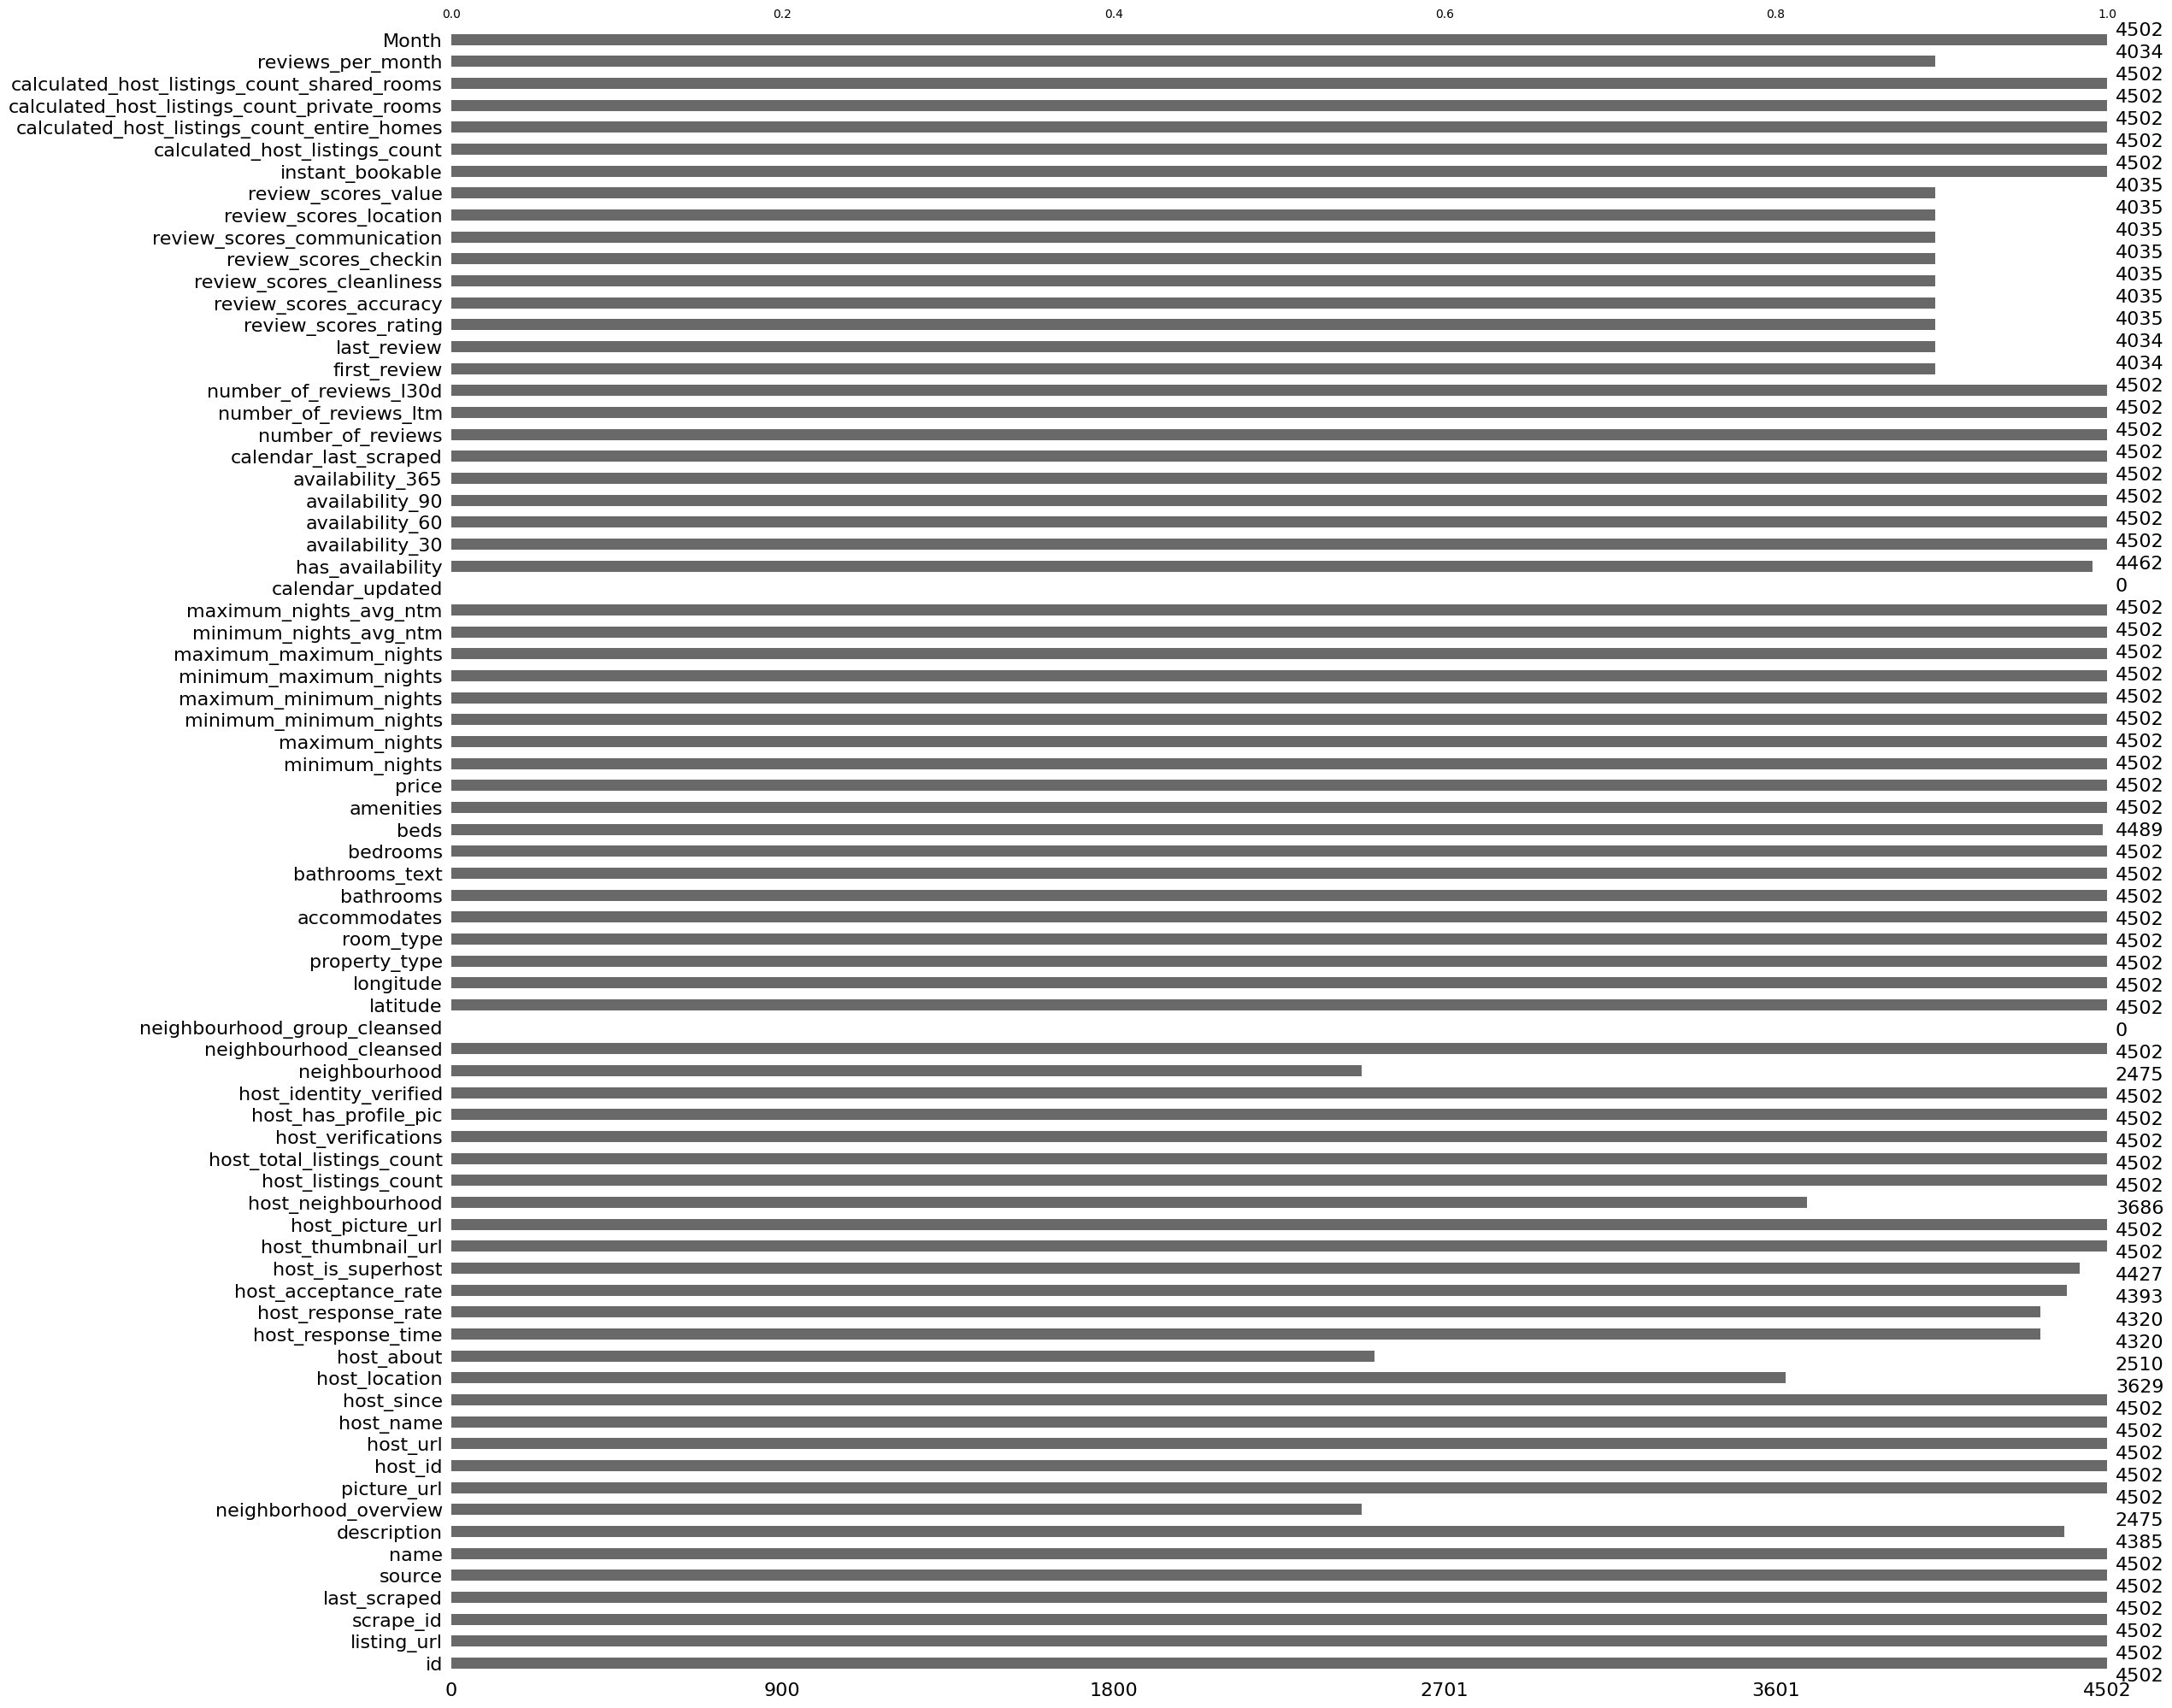

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
# 1️⃣ `0 non-null`인 컬럼 삭제
df_thr.drop(columns=["neighbourhood_group_cleansed", "calendar_updated"], inplace=True)

# 2️⃣ 설명 텍스트 컬럼 제거 (필요 없을 경우)
df_thr.drop(columns=["neighborhood_overview", "host_about"], inplace=True)

# 3️⃣ 호스트 관련 `NaN` 채우기
df_thr["host_response_time"].fillna("unknown", inplace=True)
df_thr["host_response_rate"].fillna("unknown", inplace=True)
df_thr["host_acceptance_rate"].fillna("unknown", inplace=True)
df_thr["host_is_superhost"].fillna("f", inplace=True)

# 4️⃣ `bathrooms`, `beds` 결측값을 중앙값으로 채우기
df_thr["bathrooms"].fillna(df["bathrooms"].median(), inplace=True)
df_thr["beds"].fillna(df["beds"].median(), inplace=True)

# 5️⃣ 리뷰 관련 `NaN` 처리
df_thr["reviews_per_month"].fillna(0, inplace=True)  # 리뷰가 없으면 0으로 채움

# 6️⃣ `first_review`, `last_review`, `review_scores_*` 처리
df_thr.drop(columns=["first_review", "last_review"], inplace=True)  # 리뷰 없는 숙소 제거 가능
df_thr.fillna(df.mean(numeric_only=True), inplace=True)  # 숫자형 컬럼은 평균값으로 채우기

# 7️⃣ 최종 데이터 확인
print("✅ 결측값 처리 완료!")
print(df_thr.isnull().sum())  # 남아 있는 NaN 개수 확인

✅ 결측값 처리 완료!
id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Month                                           0
Length: 70, dtype: int64


<ipython-input-21-61c21ef7756c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_thr["host_response_time"].fillna("unknown", inplace=True)
<ipython-input-21-61c21ef7756c>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

<Axes: >

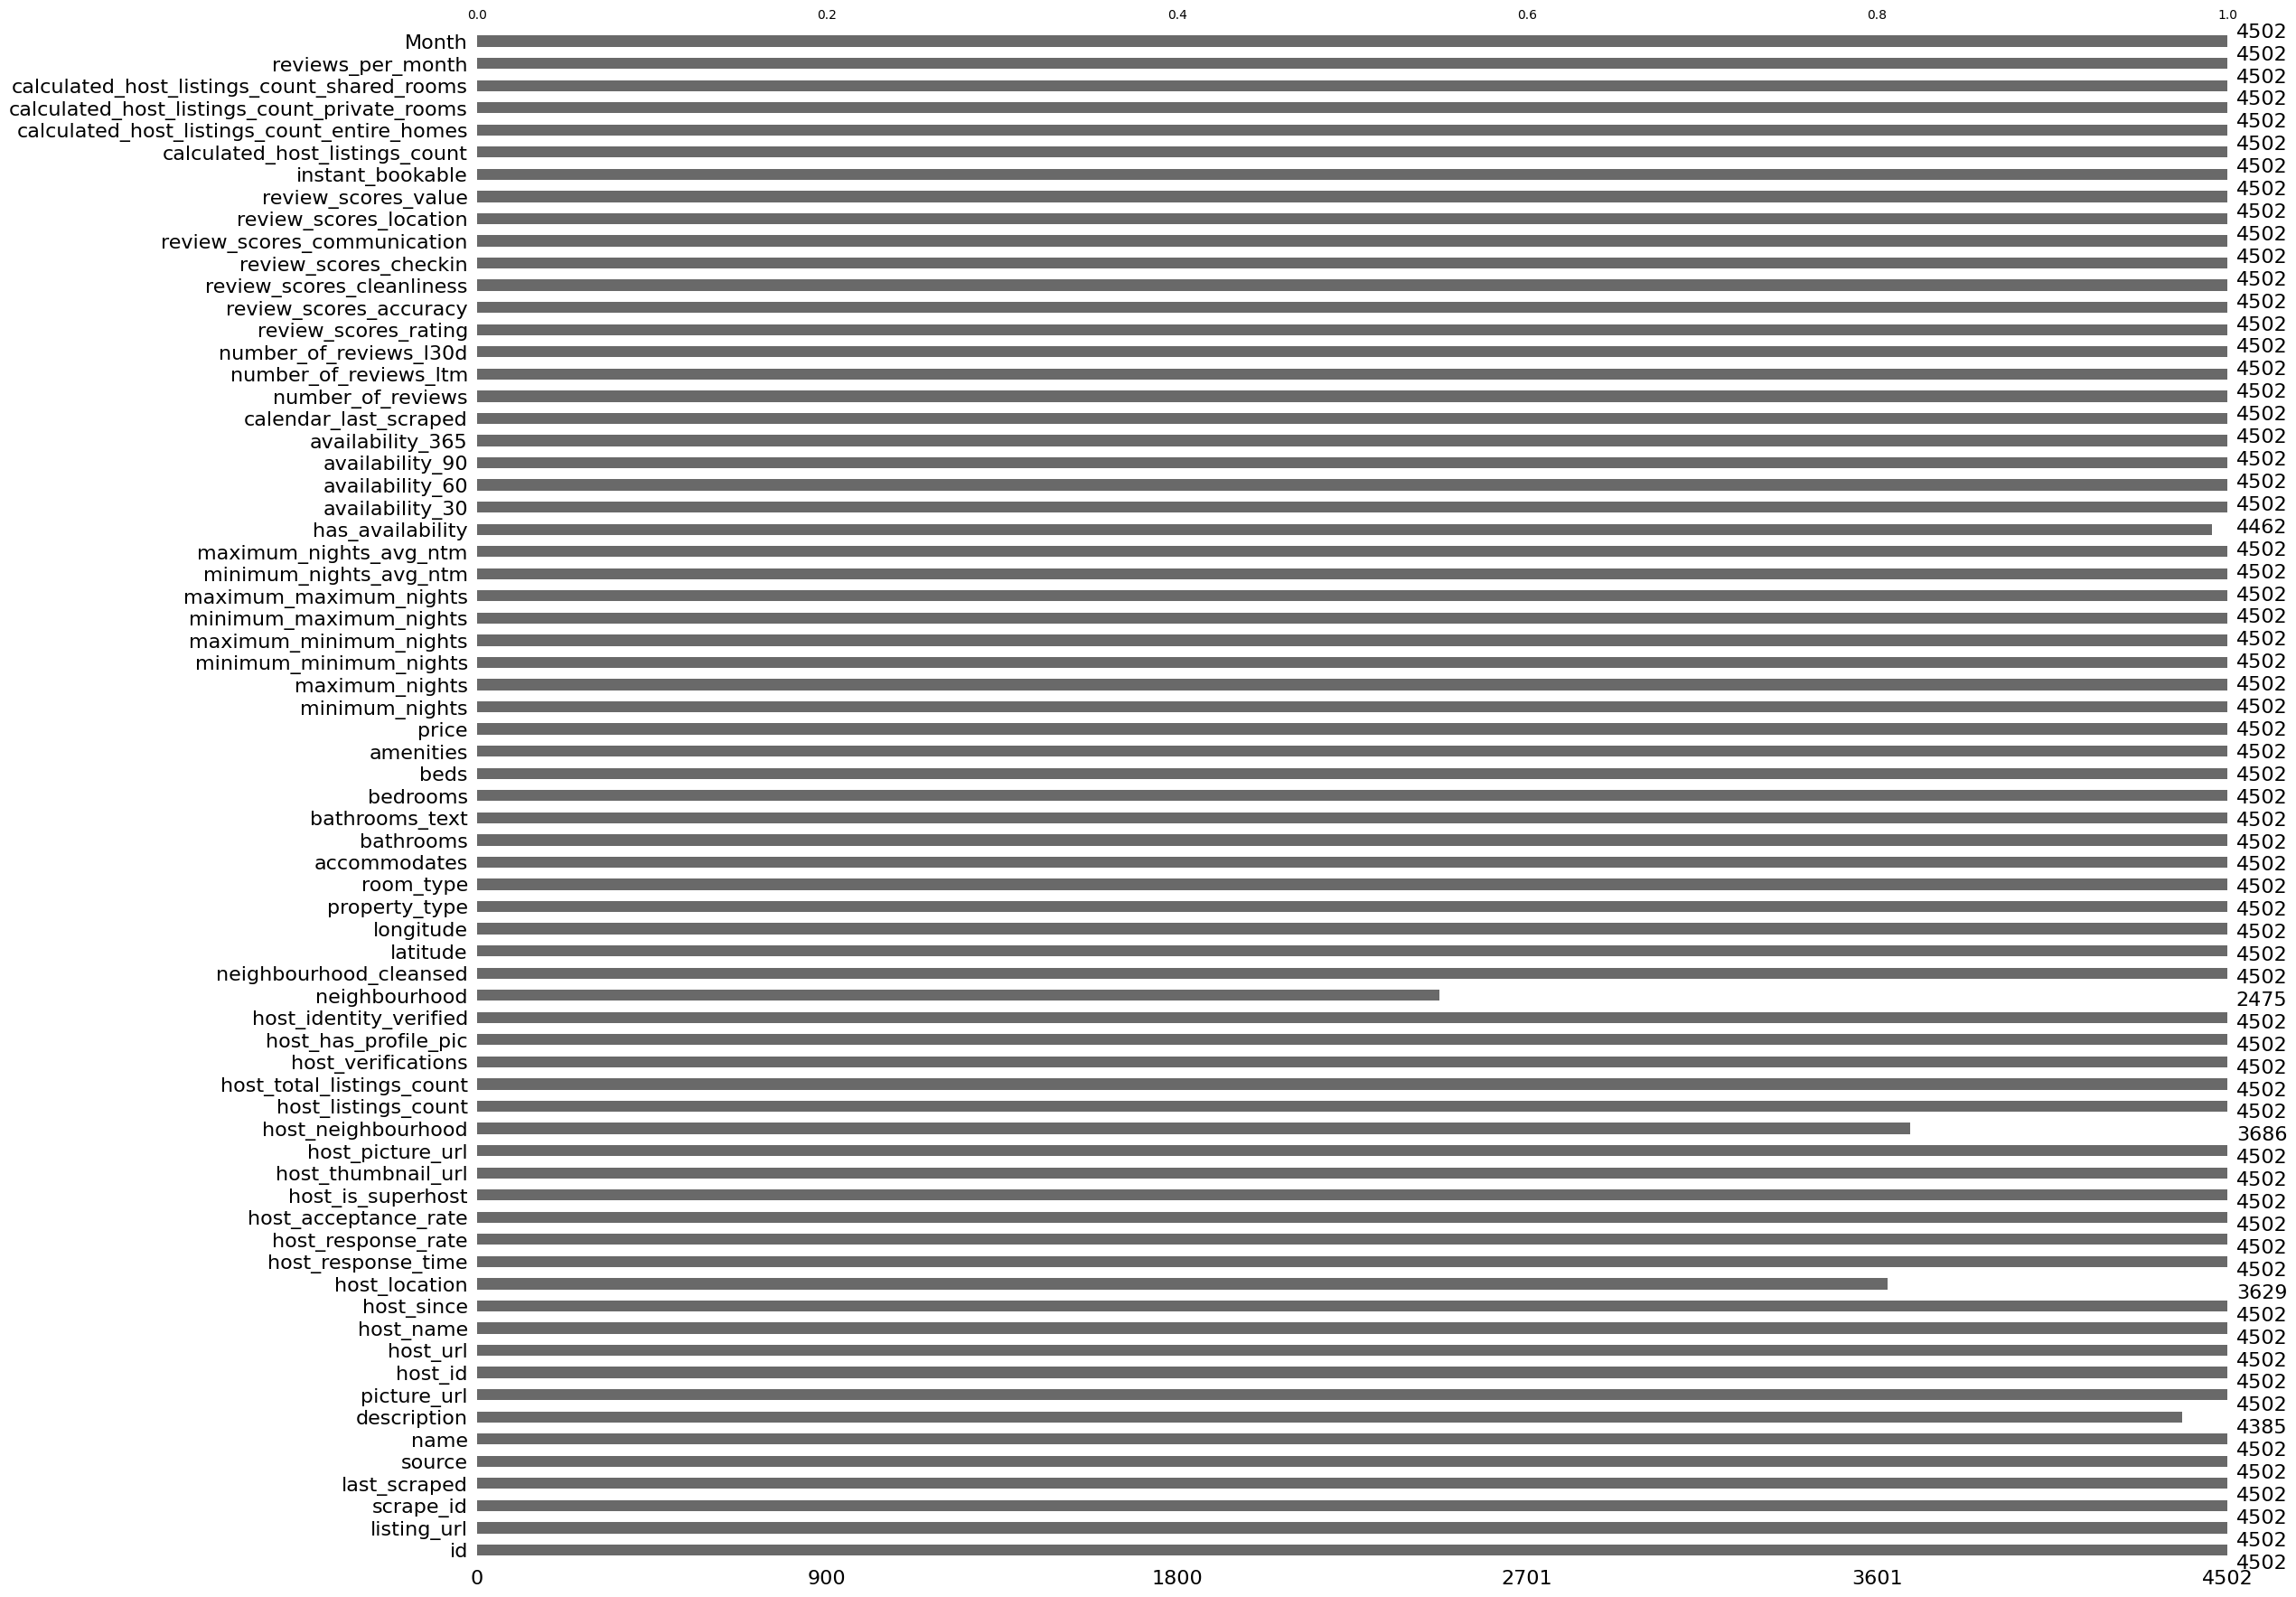

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df_thr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4502 entries, 1 to 4944
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4502 non-null   int64         
 1   listing_url                                   4502 non-null   object        
 2   scrape_id                                     4502 non-null   int64         
 3   last_scraped                                  4502 non-null   object        
 4   source                                        4502 non-null   object        
 5   name                                          4502 non-null   object        
 6   description                                   4385 non-null   object        
 7   picture_url                                   4502 non-null   object        
 8   host_id                                       4502 non-null   int64      

In [ ]:
df_thr.amenities.head()

,amenities
1,"[""Refrigerator"", ""Hot water"", ""Essentials"", ""S..."
2,"[""Refrigerator"", ""Hot water"", ""Essentials"", ""S..."
3,"[""Refrigerator"", ""Hot water"", ""Essentials"", ""S..."
4,"[""Shower gel"", ""Refrigerator"", ""Hot water"", ""E..."
5,"[""Shower gel"", ""Refrigerator"", ""Hot water"", ""E..."


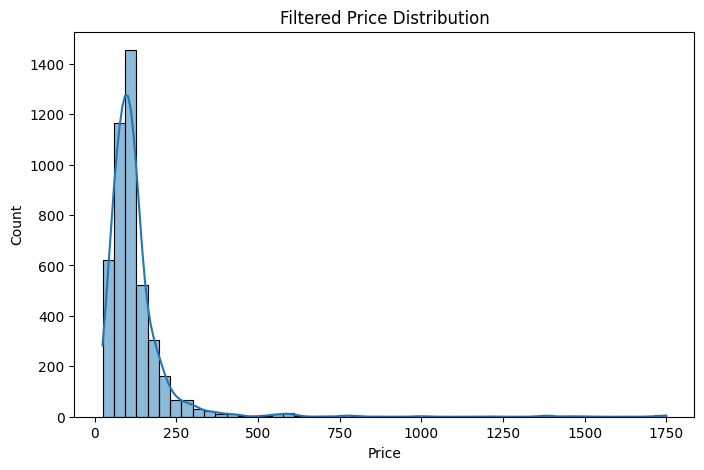

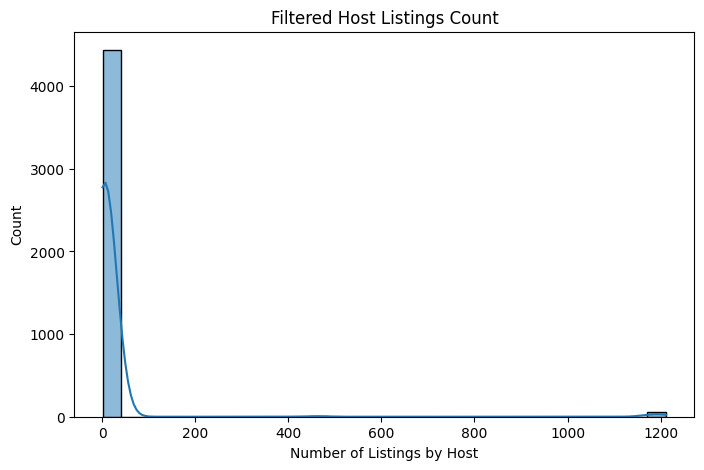

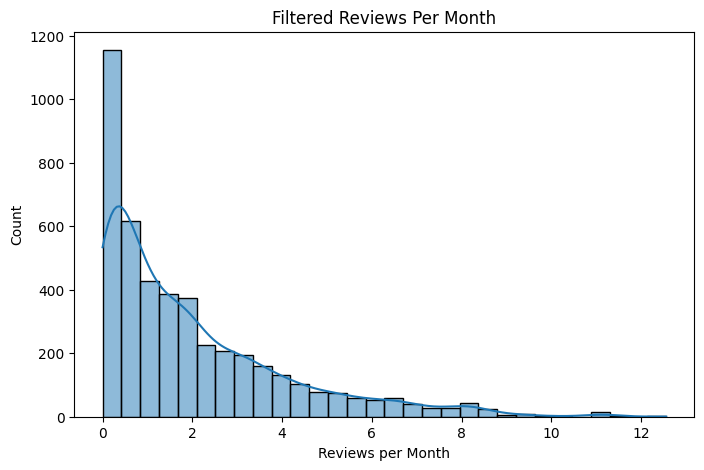

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ 가격 분포 확인
plt.figure(figsize=(8, 5))
sns.histplot(df_thr["price"], bins=50, kde=True)
plt.title("Filtered Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# 2️⃣ 호스트 숙소 개수 확인
plt.figure(figsize=(8, 5))
sns.histplot(df_thr["host_listings_count"], bins=30, kde=True)
plt.title("Filtered Host Listings Count")
plt.xlabel("Number of Listings by Host")
plt.ylabel("Count")
plt.show()

# 3️⃣ 월별 리뷰 수 확인
plt.figure(figsize=(8, 5))
sns.histplot(df_thr["reviews_per_month"], bins=30, kde=True)
plt.title("Filtered Reviews Per Month")
plt.xlabel("Reviews per Month")
plt.ylabel("Count")
plt.show()

In [ ]:
# 2️⃣ neighbourhood 결측값 처리 (neighbourhood_cleansed 값으로 채우기)
df_thr["neighbourhood"].fillna(df["neighbourhood_cleansed"], inplace=True)
df_thr["neighbourhood"].fillna("Unknown", inplace=True)  # 추가적으로 Unknown 처리
# 1️⃣ host_location 결측값 처리 (neighbourhood_cleansed 값으로 채우기)
df_thr["host_location"].fillna(df["neighbourhood_cleansed"], inplace=True)
df_thr["host_location"].fillna("Unknown", inplace=True)  # 추가적으로 Unknown 처리
# 3️⃣ 결측값이 제대로 처리되었는지 확인
print("📌 `host_location` 결측값 개수:", df_thr["host_location"].isnull().sum())
print("📌 `neighbourhood` 결측값 개수:", df_thr["neighbourhood"].isnull().sum())

📌 `host_location` 결측값 개수: 0
📌 `neighbourhood` 결측값 개수: 0


<ipython-input-30-29916f8b31bd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_thr["host_location"].fillna(df["neighbourhood_cleansed"], inplace=True)


In [ ]:
import plotly.figure_factory as ff

# 숫자형 컬럼만 선택하여 상관관계 계산
df_thr_corr = df_thr.select_dtypes(include=['number']).corr().round(2)

# x, y 축 라벨 설정
x_labels = df_thr_corr.columns.tolist()
y_labels = df_thr_corr.index.tolist()

# 히트맵 생성 (색상 및 간격 조정)
fig = ff.create_annotated_heatmap(
    x=x_labels,
    y=y_labels,
    z=df_thr_corr.values,
    annotation_text=df_thr_corr.values,  # 숫자값 표시
    colorscale="RdBu_r",  # 대조적인 색상 (파랑-빨강)
    zmin=-1, zmax=1,  # 상관계수 범위 설정 (-1 ~ 1)
    xgap=3, ygap=3,  # 간격 증가로 가독성 향상
    showscale=True
)

# 그래프 스타일 업데이트
fig.update_layout(
    title="<b>컬럼간 상관관계 Heat Map</b>",
    title_font=dict(size=20),
    xaxis=dict(
        side="bottom",
        tickangle=-45,  # x축 기울기 조정
        tickfont=dict(size=12)  # 축 글씨 크기 조정
    ),
    yaxis=dict(
        autorange="reversed",
        tickfont=dict(size=12),
        color= "black"  # 축 글씨 크기 조정
    ),
    width=850, height=850,  # 그래프 크기 조정
    margin=dict(l=100, r=100, t=100, b=100)  # 여백 조정
)

fig.show()